In [1]:
import sys
lib_path = '/home/jovyan/libs'
sys.path.insert(0, lib_path)

In [2]:
%reload_ext autoreload
%autoreload 2

import torch
import whisper
import tqdm
import librosa

from datasets import load_from_disk

In [3]:
mel_center_freqs = torch.from_numpy(librosa.mel_frequencies(n_mels=80, fmin=0, fmax=8000))

In [4]:
data = load_from_disk("../tedlium/train.hf").with_format("torch").select(range(200))

Loading dataset from disk:   0%|          | 0/109 [00:00<?, ?it/s]

In [60]:
snippet = torch.load("tensors/snippets.pt", weights_only=True).detach().cpu()[-1,:]

In [40]:
gyatt = torch.tensor(0)

for d in tqdm.tqdm(data, desc="Collating", leave=True, ncols=0):
    gyatt = gyatt + torch.sum(whisper.log_mel_spectrogram(d["audio"]), dim=1) / d["audio"].size(0)

Collating: 100% 200/200 [05:53<00:00,  1.77s/it]


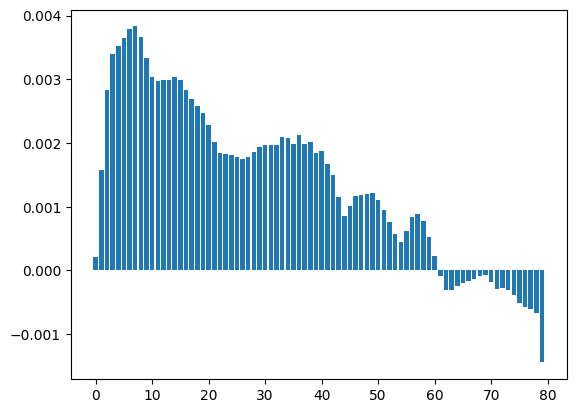

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.bar(x=range(0, 80), height=gyatt / 200)
plt.show()

In [61]:
snippet.shape

torch.Size([10240])

In [62]:
snippet_mel = torch.sum(whisper.log_mel_spectrogram(snippet), dim=1)

In [63]:
snippet_mel.shape

torch.Size([80])

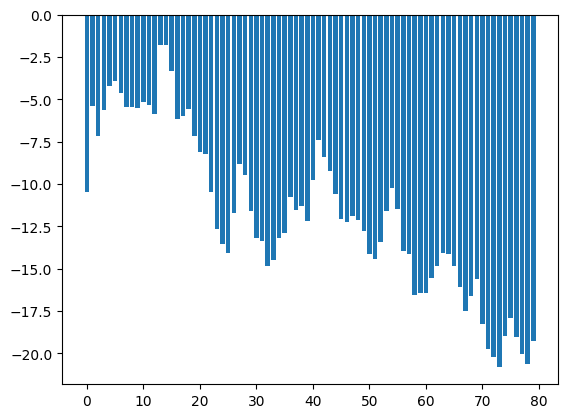

In [64]:
plt.bar(x=range(0, 80), height=torch.sum(whisper.log_mel_spectrogram(snippet), dim=1))
plt.show()